# I. Perkenalan
Nama : Reido Vidaya Mahardika  
Batch : 040  
Tableau : https://public.tableau.com/views/Usedcar_vis/Model?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# II. Identifikasi Masalah

Problem Statement: Sebagai data analyst saya ingin mengetahui faktor apa saja yang mempengaruhi harga mobil bekas pada beberapa model mobil mercedes. saya juga ingin memberikan referensi kepada penjual maupun pembeli mobil bekas untuk bisa mengetahui hal apa saja yang harus diperhatikan ketika ingin membeli atau menjual mobil bekas. Pada analisis ini saya ingin mengetahui apakah model, tahun produksi, jenis transmisi dan jumlah mileage berpengaruh terhadap harga mobil

Specific : Analisis faktor apa saja yang mempengaruhi harga mobil bekas mercedes.

Measurable : Menghitung faktor yang mempengaruhi harga mobil bekas mercedes.

Achieveable :  Dengan menghitung harga berdasarkan model, jenis transmisi, jumlah mileage dan tahun produksi maka dapat diketahui faktor yang mempengaruhi harga mobil bekas mercedes.

Relevant : Analisis ini dapat digunakan showroom mobil untuk mengambil keputusan terkait harga jual dan beli mobil bekas. Untuk pembeli juga dapat digunakan sebagai refrensi untuk membeli mobil bekas terutama brand mercedes

Time-bound : Analysis dilakukan berdasarkan tahun produksi mobil dari 2012 sampai 2020.
  

# III. Data Loading

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [4]:
import pandas as pd
df = pd.read_csv('merc.csv')

In [ ]:
#cek df
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [ ]:
# cek summary dan missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
df['model'].unique()


array([' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class',
       ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' C Class',
       ' E Class', ' GL Class', ' CLS Class', ' CLC Class', ' CLA Class',
       ' V Class', ' M Class', ' CL Class', ' GLS Class', ' GLB Class',
       ' X-CLASS', '180', ' CLK', ' R Class', '230', '220', '200'],
      dtype=object)

In [ ]:
df['year'].unique()

array([2005, 2017, 2016, 2011, 2018, 2012, 2019, 2020, 2014, 2015, 2006,
       2010, 2004, 2008, 2013, 2007, 2009, 2003, 2001, 2002, 1998, 2000,
       1997, 1999, 1970], dtype=int64)

In [ ]:
df['price'].unique()

array([ 5200, 34948, 49948, ..., 34459, 25829, 19344], dtype=int64)

In [ ]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [ ]:
df['mileage'].unique()

array([63000, 27000,  6200, ..., 11442, 11612,  2426], dtype=int64)

In [ ]:
df['fuelType'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype=object)

In [ ]:
df['tax'].unique()

array([325,  20, 555, 570, 145, 265,  30, 125, 150, 165, 330, 205, 160,
       300, 240, 280, 200, 190, 140, 315, 270, 305, 235, 260, 135,   0,
       580, 565,  10, 115, 230, 290, 220, 540, 195, 520, 250, 255, 185,
       210], dtype=int64)

In [ ]:
df['mpg'].unique()

array([ 32.1,  61.4,  28. ,  30.4,  30.1,  21.4,  47.9,  36.7,  64.2,
        35.8,  62.8,  55.4,  21.7,  56.6,  68.9,  60.1,  29.5,  51.4,
        52.3,  36.2,  70.6,  49.6,  54.3,  45.6,  65.7,  44.8,  56.5,
        43.5,  41.5,  57.7,  67.3,  34. ,  29.1,  40.9,  34.4,  42.8,
        35.3,  44.1,  28.8,  37.7,  42.4,  53.3,  37.2,  33.2,  32.5,
        47.1,  28.5,  46.3,  58.9,  32.8,  48.7, 134.5,  50.4,  42.2,
        72.4,  25.2,  74.3,  39.2,  23.5,  38.2,  31.4,  32.9, 122.8,
        33.6,  76.4,  31.7,  78.5,  34.5,  22.6,  39.8,  40.4,  27.4,
        80.7,  29.4,  31. ,  29.7,  23.9, 122.9,  26.4,   1.1,  22.1,
        24.8,  21.6,  22.4,  28.3,  23. ,  33.7,  11. , 176.6,  27.7,
        27.2,  24.6,  24.1,  20.5, 188.3, 217.3,  38.7,  23.7,  26.7,
       100.9,  57.6,  53.5,  34.9,  55. ,  22.2,  30.7,  20. , 201.8,
        28.2,  23.3,  21.1,  19. ,  17.8,  44.6,  30. ,  25.5,  40. ,
        19.8,  22.3,  19.5])

In [ ]:
df['engineSize'].unique()

array([1.8, 2.1, 5.5, 4. , 6.2, 3.5, 2. , 1.5, 3. , 1.3, 2.9, 4.7, 2.5,
       1.6, 2.2, 2.3, 6. , 3.2, 0. , 5. , 2.7, 3.7, 5.4, 4.3, 1.7, 1.4])

ada whitespace pada kolom model harus dicleaning

# IV. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [5]:
#drop kolom yang mempunyai value 'other'
df = df.drop(df[(df['transmission'] == 'Other') | (df['fuelType'] == 'Other')].index)
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13111 entries, 0 to 13110
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13111 non-null  object 
 1   year          13111 non-null  int64  
 2   price         13111 non-null  int64  
 3   transmission  13111 non-null  object 
 4   mileage       13111 non-null  int64  
 5   fuelType      13111 non-null  object 
 6   tax           13111 non-null  int64  
 7   mpg           13111 non-null  float64
 8   engineSize    13111 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.0+ KB


In [6]:
#mengubah nama kolom dan perbaikan kapital di huruf pertama
df.columns = df.columns.str.title()
df =df.rename(columns={'Fueltype' : 'Fuel Type',
                        'Enginesize' : 'Engine Size',
                        'Mpg' : 'Fuel Efficiency'})
df

,Model,Year,Price,Transmission,Mileage,Fuel Type,Tax,Fuel Efficiency,Engine Size
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13106,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13107,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13108,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13109,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [7]:
# menghilangkan whitespace 
df['Model'] = df['Model'].str.strip()
df['Model'].unique()

array(['SLK', 'S Class', 'SL CLASS', 'G Class', 'GLE Class', 'GLA Class',
       'A Class', 'B Class', 'GLC Class', 'C Class', 'E Class',
       'GL Class', 'CLS Class', 'CLC Class', 'CLA Class', 'V Class',
       'M Class', 'CL Class', 'GLS Class', 'GLB Class', 'X-CLASS', '180',
       'CLK', 'R Class', '230', '220', '200'], dtype=object)

In [8]:
std = df['Year'].std()
print('standar deviasi tahun produksi:',std)
print(f"Skewness: {df['Year'].skew()}")

standar deviasi tahun produksi: 2.224992454114769
Skewness: -2.898802203043244


Dari perhitungan standar deviasi pada kolom harga produk terindikasi banyaknya variasi dalam data dan terindikasi adanya outlier  
Dari perhitungan skewness pada kolom harga produk menunjukan nilai yang tinggi dikarenakan dibawah -1 (highly skewed) dan ini menandakan distribusi harga produk lebih banyak pada range yang tinggi(negative skew)

In [9]:
#karena nilai skew kurang dari -0.5 maka menggunakan metode tukey rule
q1 = df['Year'].quantile(0.25)
q3 = df['Year'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = df['Year'][(df['Year']<low_bound) | (df['Year']>up_bound)]
df = no_outlier = df[(df['Year']>=low_bound) & (df['Year']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["Price"]):.2f}%%')

Upper Boundary: 2023.50
Lower Boundary: 2011.50
Percentage of outliers: 1.53%%


batas atas oulier adalah 2023 dan batas bawah outlier adalah 2012. maka data yang digunakan adalah data mobil bekas pada tahun 2012 - 2020 dikarenakan tahun produksi mobil di data set hanya sampai 2020 

In [ ]:
df.to_csv('usedcar.csv', index = False)

# V. Analisis dan Perhitungan

In [ ]:
#menampilkan data statistik descriptive pada setiap kolom numerik
df.describe()

,Year,Price,Mileage,Tax,Fuel Efficiency,Engine Size
count,12914.000000,12914.000000,12914.000000,12914.000000,12914.000000,12914.000000
mean,2017.453384,24962.586882,21051.314000,127.276986,55.399164,2.063737
std,1.758396,11662.260722,19660.462264,59.730590,14.992204,0.559655
min,2012.000000,5250.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17599.000000,6000.000000,125.000000,45.600000,1.600000
50%,2018.000000,22592.000000,14978.500000,145.000000,56.500000,2.000000
75%,2019.000000,28995.000000,30816.750000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,240494.000000,580.000000,217.300000,6.200000


### 1.berapa rata rata harga mobil bekas mercedes? 

In [ ]:
# Rata Rata harga mobil Mercedes
print(f'average price: {df["Price"].mean():.2f}')
print(f'median price : {df["Price"].median():.2f}')

average price:24962.59
median price : 22592.00


harga rata rata mobil bekas mercedes adalah 24962 euro dan median di angka 22592 euro. berdasarkan perhitungan rata rata berada diatas median maka dapat disimpulkan ada beberapa mobil bekas yang harganya jauh lebih tinggi dibandingkan harga mobil bekas pada umumnya

### 2.Berapa rata rata harga mobil di setiap tahun produksinya?

In [ ]:
# Rata rata harga mobil bekas mercedes per tahun
avg_per_year= df.groupby('Year')['Price'].mean().round(2)
print(avg_per_year)

Year
2012    10845.14
2013    11939.84
2014    14042.94
2015    16737.31
2016    19304.53
2017    21518.36
2018    25720.16
2019    31290.02
2020    35425.53
Name: Price, dtype: float64


Berdasarkan perhitungan avg per year dapat disimpulkan dari tahun ke tahun harga mobil bekas terus meningkat. tahun produksi mobil lebih muda juga berpengaruh terhadap harga jika tahun produksi mobil lebih baru maka hargapun lebih mahal.

<Axes: xlabel='Year'>

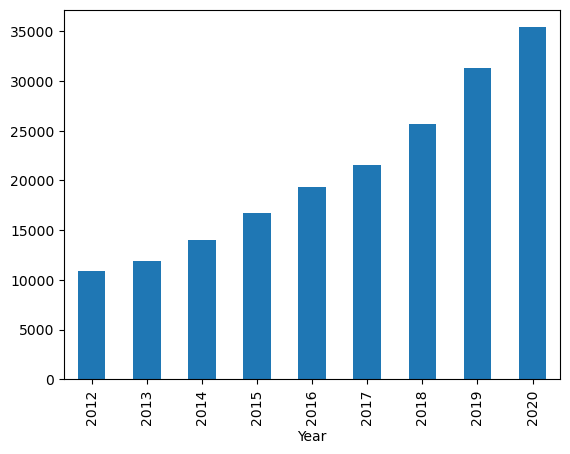

In [ ]:
avg_per_year.plot(kind='bar')

semakin baru tahun produksi mobil harga rata ratanya semakin mahal

### 3.Apakah tahun produksi berpengaruh pada harga mobil?

In [ ]:
'''
perhitungan korelasi antara tahun dan harga mobil
H0 = Tidak ada hubungan antara tahun produksi dan harga
H1 = ada hubungan antara tahun produksi dan harga
'''
corr_rho, p_val_s = stats.spearmanr(df['Price'], df['Year'])

print(f'Nilai Korelasi Spearman: {corr_rho:.2f}')
print(f'P-value: {p_val_s:.2f}')

Nilai Korelasi Spearman: 0.71
P-value: 0.00


nilai Spearman menunjukan angka 0.71 yang berarti menunjukan korelasi yang cukup kuat dan tahun mobil lebih baru maka harganya cenderung akan lebih tinggi.  
karena nilai p value kurang dari 0.05 kita menolak H0 maka tahun produksi mempunyai hubungan dengan harga mobil

### 4.Apakah jumlah mileage berpengaruh pada harga mobil? 

In [ ]:
'''
perhitungan korelasi antara mileage dan harga mobil
H0 = Tidak ada hubungan antara mileage dan harga
H1 = ada hubungan antara mileage dan harga
'''
corr_rho, p_val_s = stats.spearmanr(df['Price'], df['Mileage'])
print(f'Nilai Korelasi Spearman: {corr_rho:.2f}')
print(f'P-value: {p_val_s:.2f}')

Nilai Korelasi Spearman: -0.71
P-value: 0.00


nilai Spearman menunjukan angka -0.71 yang berarti menunjukan korelasi yang kuat dan jika harga mobil tinggi maka Mileage cenderung rendah atau sebaliknya 
karena nilai p value kurang dari 0.05 kita menolak H0 maka mileage mempunyai hubungan dengan harga mobil

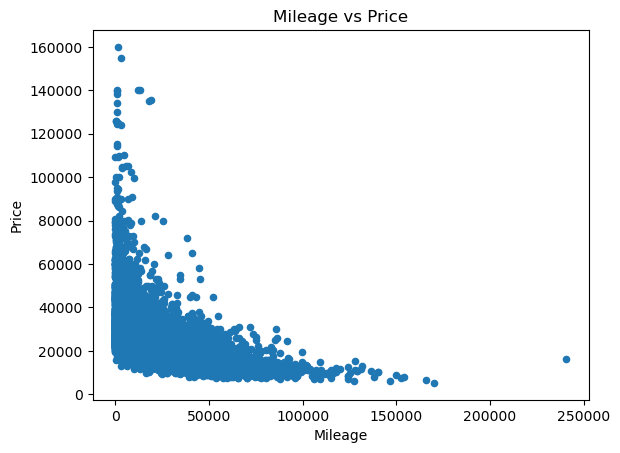

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Mileage vs Price')
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')

df.plot(kind='scatter', x='Mileage', y='Price', ax=ax)
plt.show()

berdasarkan scatter plot distribusi harga mobil dipengaruhi oleh Mileage dan ada beberapa harga mobil yang diluar outlier
pada mobil yang memiliki mileage dibawah 100000 terlihat mileage berpengaruh jika lebih muda tahunnya maka harga mobilnya akan lebih mahal terutama saat mileage dibawah 50000 terlihat perbedaan harga yang cukup signifikan
pada mobil yang memiliki mileage diatas 100000 telihat perubahan harga mobil tidak terlalu terlalu signifikan dan cenderung stabil


### 5.Apakah model mobil dan jenis transmisi berpengaruh pada harga mobil?

In [ ]:
'''
perhitungan korelasi antara model dan harga mobil
H0 = Tidak ada hubungan model dan transmisi mobil dengan harga
H1 = ada hubungan model dan transmisi mobil dengan harga
'''
group1 = df.groupby(['Model', 'Transmission'])['Price'].apply(list)
p_val = stats.f_oneway(*group1)
print('P-value:' ,round(p_val.pvalue, 2))

P-value: 0.0


karena nilai p value kurang dari 0.05 kita menolak H0 maka model mobil dan Jenis transmisi mempunyai hubungan dengan harga mobil

# VI. Pengambilan Keputusan

Setekah dilakukan analisis ternyata harga mobil tidak dipengaruhi oleh salah satu faktor saja. Harga mobil dapat dipengaruhi berdasarkan model, jenis transmisi, jumlah mileage, dan tahun produksinya. Model mobil berpengaruh dikarenakan pabrik otomotif membuat mobil berdasarkan kelasnya mulai dari harga yang murah sampai mahal. jenis transmisi juga berpengaruh untuk yang termurah ada pada transmisi Manual. Jumlah Mileage berpengaruh jika semakin sedikit jumlah mileagenya harga mobil semakin meningkat dan yang terakhir pada tahun produksi, jika tahun produksi semakin baru maka harga mobil lebih mahal. 

#